### Задание 1
#### Условие
Дана модель Кермака-МакКендрика:
\begin{cases}
 \dot N_1(t) = -N_1(t)N_2(t), \\
 \dot N_2(t) = -\alpha N_2(t)(1 - N_1(t)),(1) \\
 \dot N_3(t) = \alpha N_2(t).
\end{cases}
Здесь $ N_1(t) $ – доля населения, восприимчивая к заражению данным вирусом;
$ N_2(t) $ – степень зараженности населения на данный момент; $N_3(t)$ – мера
невосприимчивости к данному вирусу (иммунитет); $\alpha$ – положительный параметр. Число людей, которые заражаются повторно, пропорционально величине $N_1(t) N_2(t)$.
Задачи:
1. Найти положения равновесия системы (1).
2. Исследовать на устойчивость положения равновесия системы (1).
3. Построить фазовые портреты системы (1) для разных начальных условий.
4. Установить бифуркационные значения параметра $\alpha$ для $N_2(t)$ и $N_3(t)$.

#### Решение задачи

Подключаем библиотеки:

In [1]:
from numpy import *
import pylab as p
from scipy.integrate import odeint
from scipy.optimize import fsolve

Устанавливаем параметр $\alpha$ :

In [2]:
alpha = 0.5

Определяем систему:

In [3]:
def dN_dt(N, t=0):
    return array([ -N[0]*N[1],
                  -alpha*N[1]*(1 - N[0]),
                  alpha*N[1]
                 ])

Из системы видно, что она обладает множеством положений равновесий. Рассмотрим на примере несколько из них.

**Первое** положение равновесие найдем с помощью функции *fsolve* из пакета *scipy.optimize*:

In [4]:
N_f0 = array(fsolve(dN_dt, (100,0,1)))
result = dN_dt(N_f0)
N_f0, result                                 #the result should consist of zeros

(array([ 100.,    0.,    1.]), array([-0.,  0.,  0.]))

Стоит отметить, что при $N_2 = 0 $ можно выбирать любые $N_1$ и $N_3$. 

**Вторую** точку выбираем следующим образом:

In [5]:
N_f1 = array([3, 0, 15])
result = dN_dt(N_f1)
N_f1, result

(array([ 3,  0, 15]), array([ 0.,  0.,  0.]))

**Третью** точку подбираем аналогично:

In [6]:
N_f2 = array([1.0, 0.0, 0.5])
result = dN_dt(N_f2)
N_f2, result

(array([ 1. ,  0. ,  0.5]), array([-0., -0.,  0.]))

Далее выписываем якобиан для того, что бы определить типы положений равновесия:

In [7]:
def jacobian(N, t=0):
    """ Return the Jacobian matrix evaluated in N. """
    return array([[-N[1],      -N[0],           0],
                  [ alpha*N[1], alpha*(N[0]-1), 0],
                  [ 0,          alpha,          0]
                 ])

Вычисляем якобианы и собственные числа:

In [8]:
A_f0 = jacobian(N_f0)
vlambda0 = linalg.eigvals(A_f0)
vlambda0

array([ -0. ,   0. ,  49.5])

In [9]:
A_f1 = jacobian(N_f1)
vlambda1 = linalg.eigvals(A_f1)
vlambda1

array([ 0.,  0.,  1.])

In [10]:
A_f2 = jacobian(N_f2)
vlambda2 = linalg.eigvals(A_f2)
vlambda2

array([-0.,  0.,  0.])

Рассмотрим полученные собственные векторы:
1. $\lambda_1 = 0, \lambda_2 = 0, \lambda_3 = 49.5$ - в данном случае вся прямая, проходящая через начало координат и направленная вдоль одного вектора, состоит из точек равновесия (эти точки не имеют специального названия). Фазовые траектории представляют собой лучи, параллельные другому собственному вектору. А так как $\lambda_3 = 49.5 > 0$ движение происходит от вектора с точками равновесия. Поэтому эти точки являются неустойчивыми положениями равновесия (включая точку  N_f0 = (100.,    0.,1.))
2. $\lambda_1 = 0, \lambda_2 = 0, \lambda_3 = 1$ - тоже самое, что и в пункте 1. Точка N_f1=(3, 0, 15) является неустойчивым положением равновесия.
3. $\lambda_1 = 0, \lambda_2 = 0, \lambda_3 = 0$ - точки расположены вдоль вектора, а фазовые траектории параллельны ему. Точка N_f2=( 1. ,  0. ,  0.5) является неустойчивым положением равновесия. 

Также при исследовании удобно апроксимировать нелинейную систему линейной с помощью линеаризации. Например, для **второй** точки (3,  0, 15) линеаризованная система будет выглядеть так:
\begin{cases}
 \dot N_1(t) = -3N_2, \\
 \dot N_2(t) = 2\alpha N_2\\
 \dot N_3(t) = \alpha N_2.
\end{cases}

Из уравнения $\dot N = A \cdot N$ матрица $A$ будет выглядеть следующим образом:
\begin{pmatrix} 0 & -3 & 0 \\ 0 & 2\alpha & 0 \\ 0 & \alpha & 0\end{pmatrix}
А характеристическое уравнение:
$|A-\lambda E| = \lambda^2(2\alpha - \lambda)$
Отсюда получаем $\lambda_1 = 0, \lambda_2 = 0, \lambda_3 = 1$, то есть то, что мы получили с помощью функций пакета *numpy* для *Python*.

Как видим, при линеаризации матрица A получилась **вырожденной**, а значит система имеет бесконечное множество точек равновесия.

Решим данную систему ДУ (1) для выбранных начальных данных:

In [11]:
t = arange(0, 2.5, 0.01)
X0 = array([10, 5, 4])  
X, infodict = odeint(dN_dt, X0, t, full_output=True)
infodict['message']

'Integration successful.'

Построим график модели:

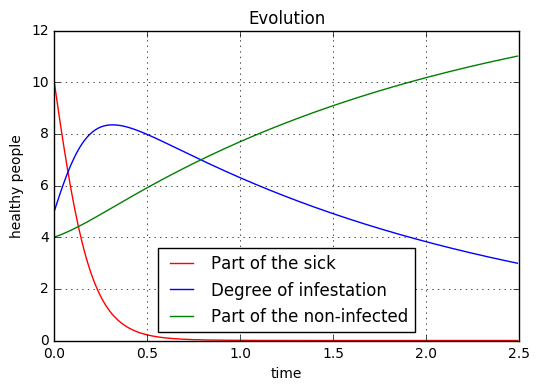

In [12]:
#!python
people, degree_of_infestation, measure_of_susceptibility  = X.T
f1 = p.figure()
p.plot(t, people, 'r-', label='Part of the sick')
p.plot(t, degree_of_infestation  , 'b-', label='Degree of infestation')
p.plot(t, measure_of_susceptibility  , 'g-', label='Part of the non-infected')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('healthy people')
p.title('Evolution')
p.show()

Построим фазовый портрет для разных значений:

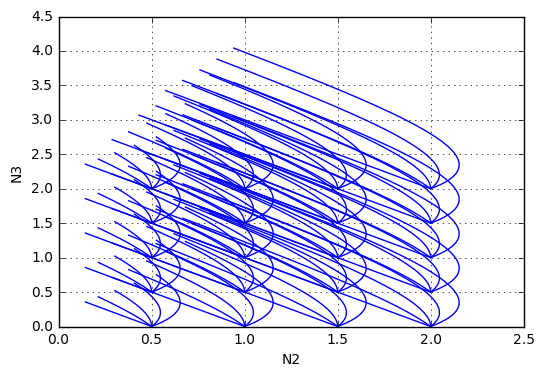

In [13]:
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

def drawPhasePortrait(deltaX = 1.0, deltaDX = 1.0, deltaZX = 1.0, startX = 0.0,  stopX = 5.0,
                      startDX = 0.0, stopDX = 5.0, startZX=1.0, stopZX=5.0, x=1, y=2):
    for y0 in frange(startX, stopX, deltaX):
            for dy0 in frange(startDX, stopDX, deltaDX):
                for dz0 in frange(startZX, stopZX, deltaZX):
                    sol = odeint(dN_dt, [y0, dy0, dz0], t)
                    p.plot(sol[:, x-1], sol[:, y-1], 'b')
    p.xlabel('N'+str(x))
    p.ylabel('N'+str(y))
    p.grid()
    p.show()

drawPhasePortrait(0.5, 0.5, 0.5, 0.0, 2.5, 0.0, 2.5, 0.0, 2.5, 2, 3)

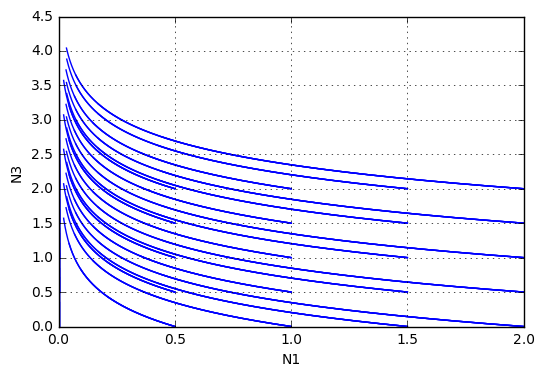

In [14]:
drawPhasePortrait(0.5, 0.5, 0.5, 0.0, 2.5, 0.0, 2.5, 0.0, 2.5, 1, 3)

На фазовых портретах мы можем заметить большое количество узлов (на первом портрете) и большое количество параллельных траекторий (на втором). Траектории могут двигаться параллельно прямой, состоящей только из точек равновесия, а могут и пересекаться с такими прямыми.

Как видно, система (1) обладает бесконечным количеством точек равновесия. Из-за этого исследование устойчивости системы становится достаточно затруднительным.

#### Использованная литература
1. [Положения равновесия линейных автономных систем](http://www.math24.ru/%D0%BF%D0%BE%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F-%D1%80%D0%B0%D0%B2%D0%BD%D0%BE%D0%B2%D0%B5%D1%81%D0%B8%D1%8F-%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D1%85-%D0%B0%D0%B2%D1%82%D0%BE%D0%BD%D0%BE%D0%BC%D0%BD%D1%8B%D1%85-%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC.html)
2. [Устойчивость в первом приближении](http://www.math24.ru/%D1%83%D1%81%D1%82%D0%BE%D0%B9%D1%87%D0%B8%D0%B2%D0%BE%D1%81%D1%82%D1%8C-%D0%B2-%D0%BF%D0%B5%D1%80%D0%B2%D0%BE%D0%BC-%D0%BF%D1%80%D0%B8%D0%B1%D0%BB%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B8.html)
3. [Автономные системы. Элементы теории устойчивости](https://mipt.ru/education/chair/mathematics/upload/0a5/pigolkina_2a5.pdf)
4. [Построение фазовых портретов на языке Python](https://digiratory.ru/435)
5. [Matplotlib: lotka volterra tutorial](http://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html)